In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 19.3 MB/s eta 0:00:00


In [2]:
import sys
!{sys.executable} -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.9 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# import seaborn as sns
# sns.set()
mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["axes.grid"] = False
mpl.rcParams["font.size"] = 16

In [4]:
import numpy as np

In [5]:
X_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_train_pca.npy')
X_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_test_pca.npy')
y_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_train.npy')
y_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_test.npy')

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=41)

In [7]:
import xgboost as xgb

In [8]:
# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(colsample_bytree=0.8840923286188427,learning_rate=0.02136758382220562,max_depth=10,n_estimators=426,reg_alpha=0,reg_lambda=1,subsample=0.8834671223572841,random_state=43,n_jobs=-1)

In [9]:
xgb_classifier.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8840923286188427, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02136758382220562,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=426, n_jobs=-1,
              num_parallel_tree=None, random_state=43, ...)

In [10]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

In [11]:
# Probability estimate
prob_pos = xgb_classifier.predict_proba(X_test)[:, 1]
# Brier Score
b_score = brier_score_loss(y_test, prob_pos)
print("Brier Score :",b_score)

Brier Score : 0.1275840810650671


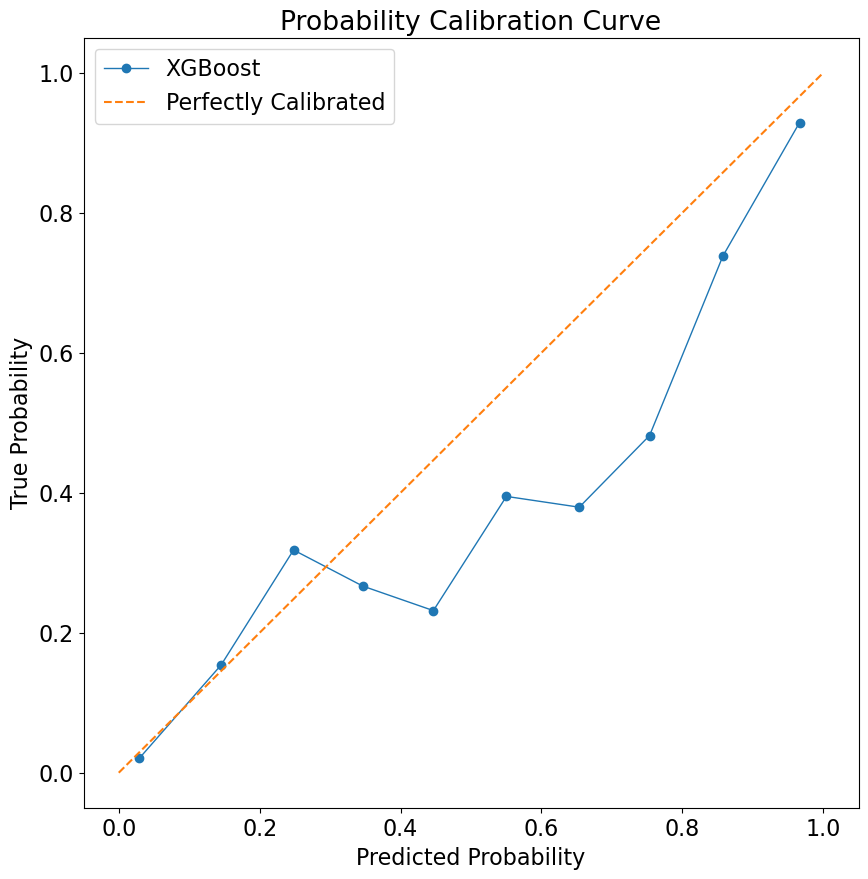

In [12]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos, n_bins=10)

#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos,
         marker='o',
         linewidth=1,
         label='XGBoost')

#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         label='Perfectly Calibrated')


# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

In [13]:
from sklearn.calibration import CalibratedClassifierCV

In [14]:
xgb_classifier_calib = CalibratedClassifierCV(xgb_classifier,method='isotonic',cv=5,n_jobs=-1)

In [15]:
xgb_classifier_calib.fit(X_train, np.ravel(y_train))

CalibratedClassifierCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8840923286188427,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.02136758382220562,
                                               max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=10, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=426, n_jobs=-1,
                                               num_parallel_tree=None,
                                               random_state=43, ...),
                       method='isotonic', n_jobs=-1)

In [16]:
# Probability estimate after calibration
prob_pos_cal = xgb_classifier_calib.predict_proba(X_test)[:, 1]
# Brier Score
b_score = brier_score_loss(y_test, prob_pos_cal)
print("Brier Score :",b_score)

Brier Score : 0.1197102138109741


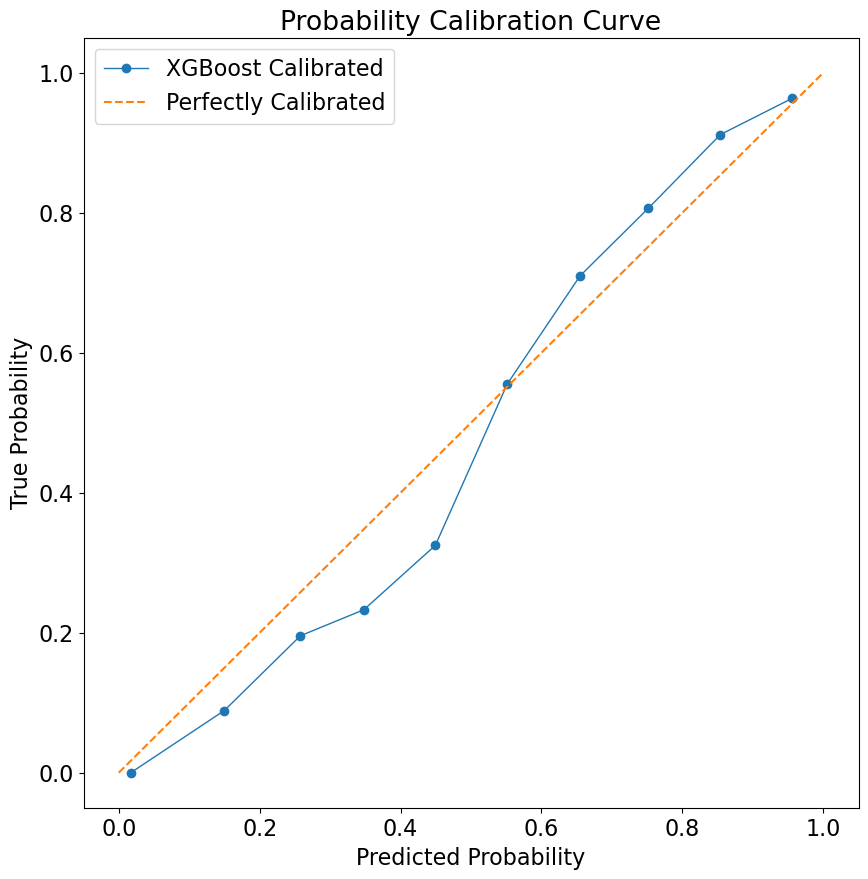

In [17]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos_cal, n_bins=10)

#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos,
         marker='o',
         linewidth=1,
         label='XGBoost Calibrated')

#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         label='Perfectly Calibrated')


# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

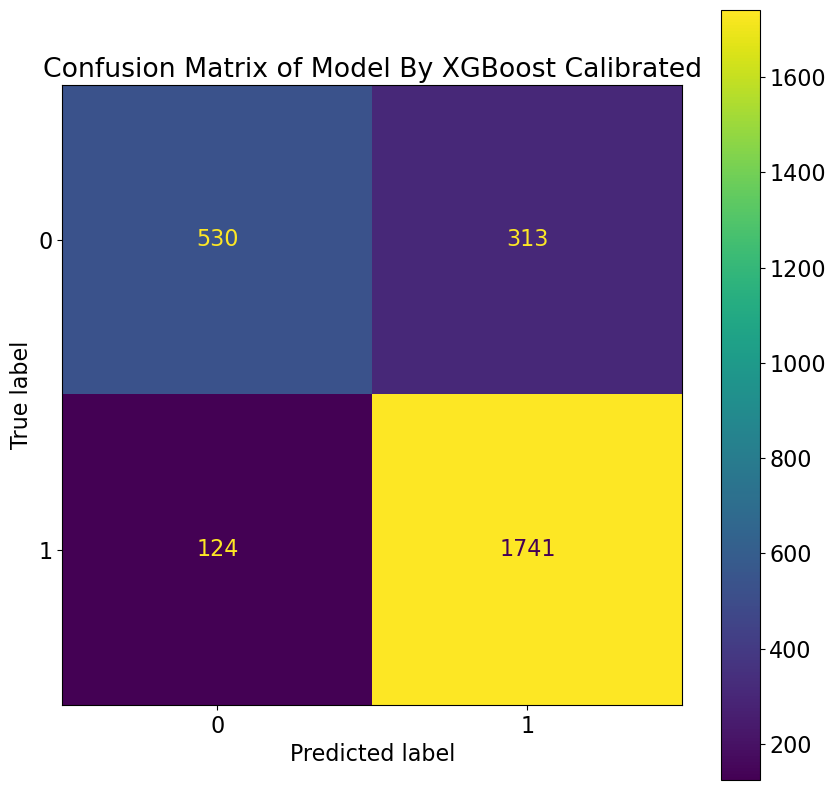

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = xgb_classifier_calib.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix of Model By XGBoost Calibrated')
# Save the figure as '.eps' file.
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_xgboost_calib.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_xgboost_calib.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_xgboost_calib.jpg', dpi=300)
plt.show()

In [19]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.metrics import roc_auc_score

In [20]:
y_fit = xgb_classifier_calib.fit(X_train, np.ravel(y_train))

In [21]:
#y_score = y_fit.predict_proba(X_test)[:,1]
y_score = y_fit.predict_proba(X_test)
#y_score = y_fit.predict(X_test)

In [22]:
# Set the default text font size
plt.rc('font', size=20)# Set the axes title font size
plt.rc('axes', titlesize=20)# Set the axes labels font size
plt.rc('axes', labelsize=20)# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)# Set the legend font size
plt.rc('legend', fontsize=17)# Set the font size of the figure title
plt.rc('figure', titlesize=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


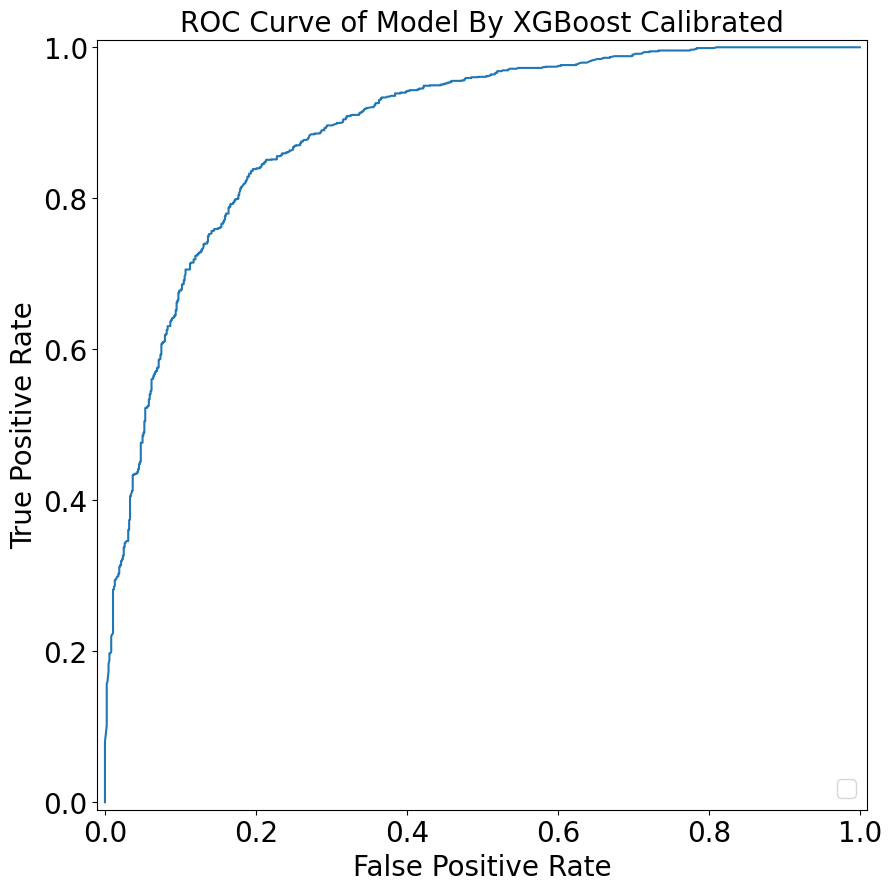

In [23]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = xgb_classifier_calib.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=xgb_classifier_calib.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.legend(loc="lower right")
plt.title('ROC Curve of Model By XGBoost Calibrated')
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_xgboost_calib.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_xgboost_calib.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_xgboost_calib.jpg', dpi=300)
plt.show()

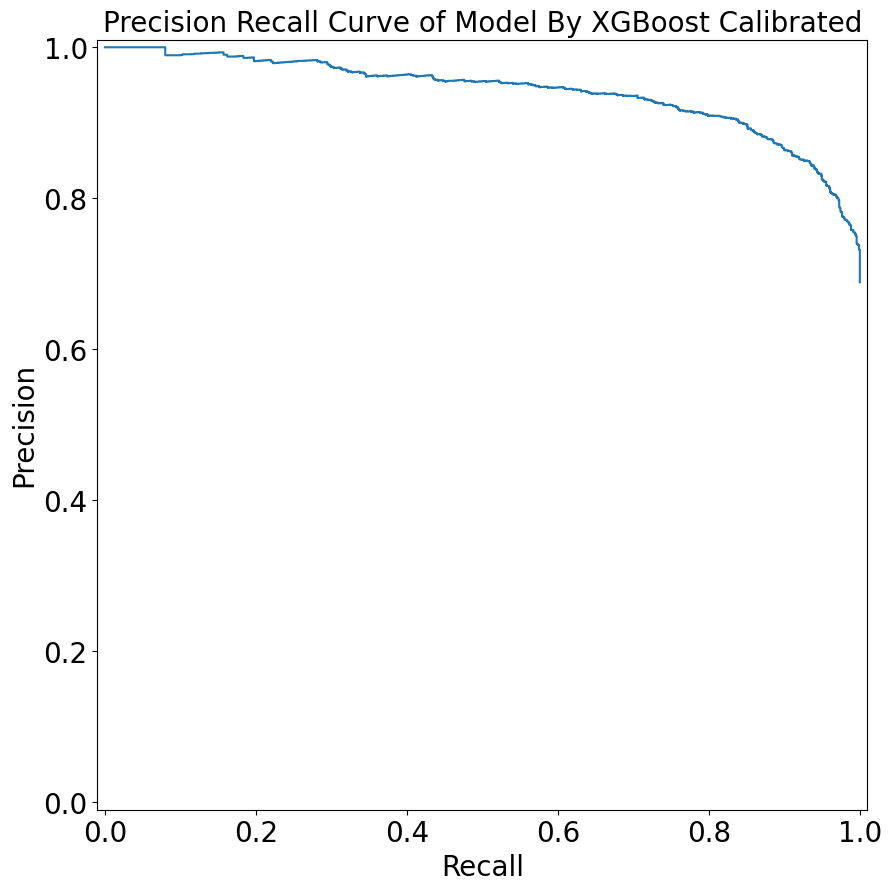

In [24]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

#prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=rf_classifier.classes_[1])
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=None)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision Recall Curve of Model By XGBoost Calibrated')
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_xgboost_calib.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_xgboost_calib.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_xgboost_calib.jpg', dpi=300)
plt.show()

In [25]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores_xgboost_accuracy = cross_val_score(xgb_classifier_calib,X,np.ravel(y),cv=cv,scoring='accuracy',n_jobs=-1)

/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [28]:
print('XGBoost accuracy',scores_xgboost_accuracy.mean())

XGBoost accuracy 0.8931314623338258


In [29]:
import joblib 

# save model with joblib 
filename = '/home/idies/workspace/Storage/s.hossain18/Permanent/Classification_Report/joblib_model.joblib'
joblib.dump(xgb_classifier_calib, filename)

['/home/idies/workspace/Storage/s.hossain18/Permanent/Classification_Report/joblib_model.joblib']